### You are asked to develop a solution that would predict what would be the right dosage for a new patient for clinical trial XYZ

### To help you, you are provide with two CSV files:

1) 10,000 rows of result data indicating if the dosage was effective, not effective, or had side effect with patient profile

2) a 500 row file that will be your validation data.  Please do not use this until you have a prediction model

### You plan to create a ML model...

Here is a VERY high level overview using dummy trial data



In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

### let's read in the CSV file containing the 10000 result 'data.csv' and check the content

The data have been already "normalized" for you

In [30]:
df = pd.read_csv('data.csv')
print('rows of data:', df.shape[0])
df.head(10)

rows of data: 10000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
0,0.6,0.0,1.0,0.0,0.2,0.40,0.60,0,1,0
1,0.4,0.0,0.0,1.0,0.4,0.25,0.21,0,1,0
2,0.6,0.0,0.0,1.0,0.7,0.25,0.60,0,1,0
3,0.2,1.0,0.0,0.0,0.4,0.90,0.21,0,1,0
4,0.3,1.0,0.0,0.0,0.9,0.90,0.70,0,1,0
5,0.9,1.0,0.0,0.0,0.4,0.60,0.70,0,0,1
6,0.1,1.0,0.0,0.0,0.7,0.50,0.50,0,1,0
7,0.6,1.0,0.0,0.0,0.2,0.80,0.60,0,1,0
8,0.9,1.0,0.0,0.0,0.2,0.60,0.70,0,0,1
9,0.0,1.0,0.0,0.0,0.9,0.90,0.21,0,1,0


### To train a model, we will need to split the data into training data and test data

Usually you leverage about 80% of classified data as train and 20% as test

In [31]:
train=df.sample(frac=0.8)
test=df.drop(train.index)

In [32]:
print('train data size:', train.shape[0])
train.head(10)

train data size: 8000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
189,0.8,0.0,0.0,1.0,0.3,0.25,0.21,0,0,1
1788,0.5,0.0,0.0,1.0,0.2,0.25,0.50,0,1,0
5551,0.7,0.0,0.0,1.0,1.0,0.40,0.50,0,1,0
282,0.6,0.0,1.0,0.0,0.4,1.00,0.60,1,0,0
6077,0.4,0.0,1.0,0.0,1.0,0.40,0.40,1,0,0
794,0.0,0.0,0.0,1.0,0.2,0.50,0.60,0,1,0
5085,0.1,0.0,0.0,1.0,0.7,0.70,0.80,0,1,0
5180,0.6,0.0,0.0,1.0,0.8,1.00,0.30,0,1,0
739,0.1,0.0,0.0,1.0,0.2,0.90,0.70,0,1,0
883,0.5,1.0,0.0,0.0,0.2,0.60,0.21,0,1,0


In [33]:
print('test data size:', test.shape[0])
test.head(10)

test data size: 2000


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
2,0.6,0.0,0.0,1.0,0.7,0.25,0.60,0,1,0
3,0.2,1.0,0.0,0.0,0.4,0.90,0.21,0,1,0
4,0.3,1.0,0.0,0.0,0.9,0.90,0.70,0,1,0
8,0.9,1.0,0.0,0.0,0.2,0.60,0.70,0,0,1
10,0.7,0.0,0.0,1.0,0.6,0.70,0.80,0,1,0
16,0.9,0.0,0.0,1.0,0.2,0.25,0.50,0,0,1
19,0.8,0.0,0.0,1.0,0.2,0.25,0.70,0,0,1
29,0.4,0.0,1.0,0.0,0.9,0.25,0.21,1,0,0
31,0.6,1.0,0.0,0.0,0.7,0.80,0.21,0,1,0
32,0.2,1.0,0.0,0.0,0.2,0.80,0.60,0,1,0


### The train data should be extracted out as x,y where y only contains the result

In [34]:
train_x = train.iloc[:,:7]
train_x.head(10)

,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80)
189,0.8,0.0,0.0,1.0,0.3,0.25,0.21
1788,0.5,0.0,0.0,1.0,0.2,0.25,0.50
5551,0.7,0.0,0.0,1.0,1.0,0.40,0.50
282,0.6,0.0,1.0,0.0,0.4,1.00,0.60
6077,0.4,0.0,1.0,0.0,1.0,0.40,0.40
794,0.0,0.0,0.0,1.0,0.2,0.50,0.60
5085,0.1,0.0,0.0,1.0,0.7,0.70,0.80
5180,0.6,0.0,0.0,1.0,0.8,1.00,0.30
739,0.1,0.0,0.0,1.0,0.2,0.90,0.70
883,0.5,1.0,0.0,0.0,0.2,0.60,0.21


In [35]:
train_y = train.iloc[:,7:]
train_y.head(10)

,effective,no effect,side effect
189,0,0,1
1788,0,1,0
5551,0,1,0
282,1,0,0
6077,1,0,0
794,0,1,0
5085,0,1,0
5180,0,1,0
739,0,1,0
883,0,1,0


### let's do the same for test data sets

In [36]:
test_x = test.iloc[:,:7]
test_y = test.iloc[:,7:]

###  lets use keras to train a model... first convert pandas dataframe to numpy array

In [37]:
x_train = train_x.values
y_train = train_y.values
x_test = test_x.values
y_test = test_y.values
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

### let's check for bias in the training data

count for: 0 902.0
count for: 1 5998.0
count for: 2 1100.0
0=effective, 1=no effect, 2=showing side effect


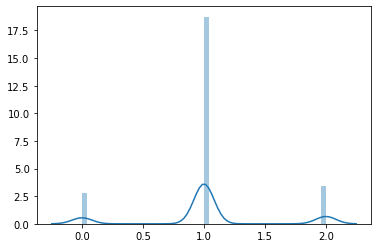

In [38]:
%matplotlib inline
from matplotlib import pyplot as plt

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    
sns.distplot(single_y)
for i in range(3):
    print('count for:',i,single_y_count[i])
    
print('0=effective, 1=no effect, 2=showing side effect')

### Because there are more data tied to 1.0 => which means no effect, the model will be trained to predict "no effect" more than "effective" or "side effect"

### let's train a model


In [39]:
from tensorflow import keras

In [40]:
x_train.shape
data_size = x_train.shape[1]

In [41]:
model = keras.models.Sequential()

# hidden layer
model.add( keras.layers.Dense(64, input_shape=(data_size,), activation='relu'))

#output layer
model.add( keras.layers.Dense(3, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [42]:
fit_history = model.fit(x_train, y_train,
  epochs=50 ,
  batch_size=200,
  validation_data=(x_test,y_test)
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 0s 17us/sample - loss: 0.8765 - acc: 0.7038 - val_loss: 0.7430 - val_acc: 0.7405
Epoch 2/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.6769 - acc: 0.7498 - val_loss: 0.6458 - val_acc: 0.7405
Epoch 3/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5991 - acc: 0.7498 - val_loss: 0.5799 - val_acc: 0.7405
Epoch 4/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.5422 - acc: 0.7498 - val_loss: 0.5275 - val_acc: 0.7405
Epoch 5/50
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4924 - acc: 0.7510 - val_loss: 0.4783 - val_acc: 0.7470
Epoch 6/50
8000/8000 [==============================] - 0s 7us/sample - loss: 0.4471 - acc: 0.7640 - val_loss: 0.4364 - val_acc: 0.7760
Epoch 7/50
8000/8000 [==============================] - 0s 7us/sample - loss: 0.4110 - acc: 0.7936 - val_loss: 0.4042 - val_acc: 0.7940

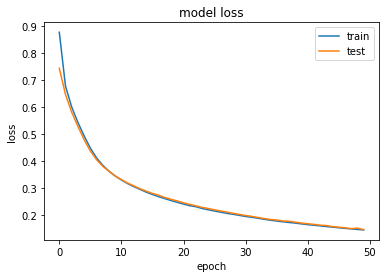

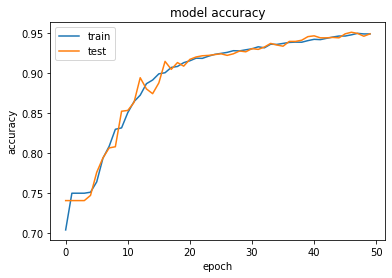

In [43]:


# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

### this simple model is predicting about 93% accuracy. Let's check against our validation set

In [44]:
val = pd.read_csv('validation.csv')
print('validation dataset:',val.shape[0])
val.head(10)

validation dataset: 500


,dosage (max:100 units),race1,race2,race3,weight (max: 300 lbs),bp (max:300/100),age (max:80),effective,no effect,side effect
0,0.0,0.0,0.0,1.0,0.5,0.30,0.80,0,1,0
1,0.7,0.0,0.0,1.0,0.3,0.80,0.21,0,1,0
2,0.5,1.0,0.0,0.0,0.6,0.25,0.21,0,1,0
3,0.4,0.0,1.0,0.0,0.4,0.90,0.21,1,0,0
4,0.8,0.0,1.0,0.0,0.9,0.60,0.60,0,1,0
5,0.8,0.0,1.0,0.0,0.3,0.25,0.50,0,1,0
6,0.3,0.0,0.0,1.0,0.2,0.25,0.50,0,1,0
7,0.3,0.0,1.0,0.0,0.2,0.50,0.21,1,0,0
8,0.7,0.0,1.0,0.0,0.2,0.80,0.80,0,1,0
9,0.9,1.0,0.0,0.0,0.4,0.40,0.21,0,0,1


In [45]:
x_val = (val.iloc[:,:7]).values
y_val = (val.iloc[:,7:]).values
y_val

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [46]:
loss, acc = model.evaluate(x_val ,y_val)
print('acc:',acc , 'loss:',loss)

500/500 [==============================] - 0s 16us/sample - loss: 0.1461 - acc: 0.9440
acc: 0.944 loss: 0.14606463587284088


In [47]:
predictions = model.predict(x_val)
my_matrix = np.zeros( (3,3), dtype='int')

# count of good guesses
count_matrix = np.zeros( (3,), dtype='int')
good_matrix = np.zeros( (3,), dtype='int')

# iterate through 10,000 test data
for i in range(val.shape[0]):
    expected = np.argmax(y_val[i])
    count_matrix[expected] +=1
    guess = np.argmax(predictions[i])
    if guess == expected:
        good_matrix[guess] +=1
    else:
        my_matrix[expected][guess] +=1
    
# show good matrix
print('Good guesses: 0=effective, 1=no effect, 2=side effect')
for i in range(3):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses: 0=effective, 1=no effect, 2=side effect
match count for: 0 = 58 / 60 ( 96.67 %)
match count for: 1 = 359 / 368 ( 97.55 %)
match count for: 2 = 55 / 72 ( 76.39 %)


### As expected, the model is more accurate with the "no effect" prediction than the "effective" and "side effect"

### Lets see where the model failed:  what was expected vs how model predicted


Confusion Matrix: 0=effective, 1=no effect, 2=side effect


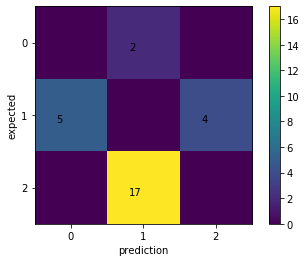

In [48]:
print('\nConfusion Matrix: 0=effective, 1=no effect, 2=side effect')

fig = plt.figure()
plt.xticks( range(3))
plt.yticks( range(3))

for y in range(3):
    for x in range(3):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix)
plt.colorbar()
plt.show()
plt.close()

### How can we make the model better? by providing a better training data set

We will try to make the count of each result about the same

There were abut 1000 counts of effective and side effect results when we allocated 80% of data for training.. so we will resplit the data to reduce reprsentation of "1" train data


In [49]:
df = pd.read_csv('data.csv')
train=df.sample(frac=0.95)
test=df.drop(train.index)
train_x = train.iloc[:,:7]
train_y = train.iloc[:,7:]
x_train = train_x.values
y_train = train_y.values
x_test = test_x.values
y_test = test_y.values

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    

for i in range(3):
    print('count for:',i,single_y_count[i])
    

count for: 0 1083.0
count for: 1 7104.0
count for: 2 1313.0


count for: 0 1083.0
count for: 1 1624.0
count for: 2 1313.0


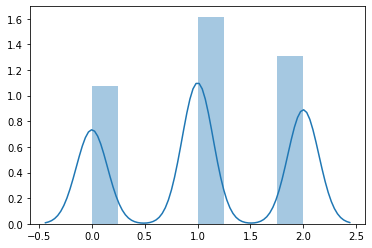

In [50]:
keep_row_count = single_y_count[0] * 1.5

    
remove_row_count = single_y_count[1] - keep_row_count
remove_index_list = []

count = 0

for i in range(y_train.shape[0]):
    if single_y[i] == 1:
        remove_index_list.append(i)
        count += 1
        if count >= remove_row_count:
            break
        
x_train = np.delete(x_train, remove_index_list , axis = 0)
y_train = np.delete(y_train, remove_index_list , axis = 0)

single_y = np.zeros(y_train.shape[0])
single_y_count = np.zeros((3,))

for i in range(y_train.shape[0]):
    y = np.argmax(y_train[i])
    single_y[i] = y
    single_y_count[y] += 1
    

for i in range(3):
    print('count for:',i,single_y_count[i])
    
sns.distplot(single_y)


In [51]:
model = keras.models.Sequential()

# hidden layer
model.add( keras.layers.Dense(64, input_shape=(data_size,), activation='relu'))
model.add( keras.layers.Dropout(0.5))
#output layer
model.add( keras.layers.Dense(3, activation='softmax'))

# compile to model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [52]:
fit_history = model.fit(x_train, y_train,
  epochs=300 ,
  batch_size=400,
  validation_data=(x_test,y_test)
)

Train on 4020 samples, validate on 2000 samples
Epoch 1/300
4020/4020 [==============================] - 0s 31us/sample - loss: 1.1103 - acc: 0.3604 - val_loss: 1.0566 - val_acc: 0.5080
Epoch 2/300
4020/4020 [==============================] - 0s 5us/sample - loss: 1.0505 - acc: 0.4597 - val_loss: 0.9821 - val_acc: 0.7145
Epoch 3/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.9980 - acc: 0.5246 - val_loss: 0.9317 - val_acc: 0.7150
Epoch 4/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.9503 - acc: 0.5649 - val_loss: 0.8813 - val_acc: 0.7305
Epoch 5/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.9037 - acc: 0.5955 - val_loss: 0.8398 - val_acc: 0.7330
Epoch 6/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.8611 - acc: 0.6291 - val_loss: 0.8027 - val_acc: 0.7220
Epoch 7/300
4020/4020 [==============================] - 0s 6us/sample - loss: 0.8135 - acc: 0.6721 - val_loss: 0.7790 - val_acc:

4020/4020 [==============================] - 0s 4us/sample - loss: 0.3325 - acc: 0.8749 - val_loss: 0.3616 - val_acc: 0.7920
Epoch 61/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.3377 - acc: 0.8664 - val_loss: 0.3497 - val_acc: 0.8015
Epoch 62/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.3360 - acc: 0.8687 - val_loss: 0.3596 - val_acc: 0.7930
Epoch 63/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.3288 - acc: 0.8744 - val_loss: 0.3588 - val_acc: 0.7950
Epoch 64/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.3216 - acc: 0.8801 - val_loss: 0.3434 - val_acc: 0.8090
Epoch 65/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.3218 - acc: 0.8781 - val_loss: 0.3367 - val_acc: 0.8115
Epoch 66/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.3216 - acc: 0.8786 - val_loss: 0.3398 - val_acc: 0.8115
Epoch 67/300
4020/4020 [=======================

4020/4020 [==============================] - 0s 4us/sample - loss: 0.2364 - acc: 0.9142 - val_loss: 0.2508 - val_acc: 0.8790
Epoch 120/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.2323 - acc: 0.9149 - val_loss: 0.2470 - val_acc: 0.8800
Epoch 121/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.2314 - acc: 0.9134 - val_loss: 0.2475 - val_acc: 0.8760
Epoch 122/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.2318 - acc: 0.9167 - val_loss: 0.2418 - val_acc: 0.8850
Epoch 123/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.2318 - acc: 0.9149 - val_loss: 0.2412 - val_acc: 0.8885
Epoch 124/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.2298 - acc: 0.9139 - val_loss: 0.2415 - val_acc: 0.8875
Epoch 125/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.2286 - acc: 0.9152 - val_loss: 0.2349 - val_acc: 0.8920
Epoch 126/300
4020/4020 [================

4020/4020 [==============================] - 0s 4us/sample - loss: 0.1876 - acc: 0.9321 - val_loss: 0.1957 - val_acc: 0.9210
Epoch 179/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1871 - acc: 0.9351 - val_loss: 0.1981 - val_acc: 0.9180
Epoch 180/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1880 - acc: 0.9308 - val_loss: 0.1949 - val_acc: 0.9215
Epoch 181/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1855 - acc: 0.9341 - val_loss: 0.1949 - val_acc: 0.9240
Epoch 182/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1866 - acc: 0.9333 - val_loss: 0.1915 - val_acc: 0.9250
Epoch 183/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.1864 - acc: 0.9313 - val_loss: 0.1875 - val_acc: 0.9280
Epoch 184/300
4020/4020 [==============================] - 0s 5us/sample - loss: 0.1851 - acc: 0.9376 - val_loss: 0.1895 - val_acc: 0.9250
Epoch 185/300
4020/4020 [================

4020/4020 [==============================] - 0s 4us/sample - loss: 0.1624 - acc: 0.9450 - val_loss: 0.1691 - val_acc: 0.9400
Epoch 238/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1645 - acc: 0.9410 - val_loss: 0.1721 - val_acc: 0.9380
Epoch 239/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1647 - acc: 0.9425 - val_loss: 0.1693 - val_acc: 0.9395
Epoch 240/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1625 - acc: 0.9408 - val_loss: 0.1624 - val_acc: 0.9415
Epoch 241/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1643 - acc: 0.9415 - val_loss: 0.1658 - val_acc: 0.9410
Epoch 242/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1600 - acc: 0.9445 - val_loss: 0.1707 - val_acc: 0.9355
Epoch 243/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1568 - acc: 0.9438 - val_loss: 0.1677 - val_acc: 0.9400
Epoch 244/300
4020/4020 [================

4020/4020 [==============================] - 0s 4us/sample - loss: 0.1456 - acc: 0.9468 - val_loss: 0.1434 - val_acc: 0.9490
Epoch 297/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1420 - acc: 0.9505 - val_loss: 0.1519 - val_acc: 0.9420
Epoch 298/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1409 - acc: 0.9498 - val_loss: 0.1496 - val_acc: 0.9460
Epoch 299/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1458 - acc: 0.9493 - val_loss: 0.1478 - val_acc: 0.9460
Epoch 300/300
4020/4020 [==============================] - 0s 4us/sample - loss: 0.1472 - acc: 0.9488 - val_loss: 0.1507 - val_acc: 0.9445


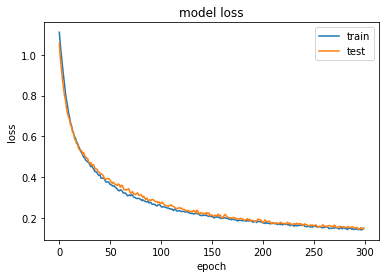

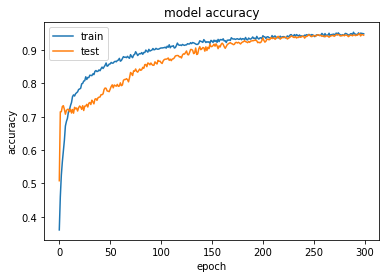

In [53]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

In [54]:
loss, acc = model.evaluate(x_val ,y_val)
print('acc:',acc , 'loss:',loss)

500/500 [==============================] - 0s 18us/sample - loss: 0.1424 - acc: 0.9440
acc: 0.944 loss: 0.14236481142044066


In [55]:
predictions = model.predict(x_val)
my_matrix = np.zeros( (3,3), dtype='int')

# count of good guesses
count_matrix = np.zeros( (3,), dtype='int')
good_matrix = np.zeros( (3,), dtype='int')

# iterate through 10,000 test data
for i in range(val.shape[0]):
    expected = np.argmax(y_val[i])
    count_matrix[expected] +=1
    guess = np.argmax(predictions[i])
    if guess == expected:
        good_matrix[guess] +=1
    else:
        my_matrix[expected][guess] +=1
    
# show good matrix
print('Good guesses: 0=effective, 1=no effect, 2=side effect')
for i in range(3):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)

Good guesses: 0=effective, 1=no effect, 2=side effect
match count for: 0 = 60 / 60 ( 100.00 %)
match count for: 1 = 343 / 368 ( 93.21 %)
match count for: 2 = 69 / 72 ( 95.83 %)


### the prediction result is a bit better


Confusion Matrix: 0=effective, 1=no effect, 2=side effect


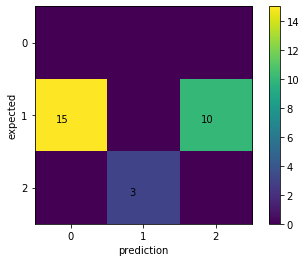

In [56]:
print('\nConfusion Matrix: 0=effective, 1=no effect, 2=side effect')

fig = plt.figure()
plt.xticks( range(3))
plt.yticks( range(3))

for y in range(3):
    for x in range(3):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix)
plt.colorbar()
plt.show()
plt.close()